# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [4]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.7499999832361937


When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
from drl_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch
from unityagents import UnityEnvironment

%matplotlib inline

In [9]:
# DDPG function

def ddpg(n_episodes=500, max_t=1000, solved_score=30.0, consec_episodes=100, print_every=1, train_mode=True,
         actor_path='actor_ckpt.pth', critic_path='critic_ckpt.pth'):
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode
        solved_score (float)  : min avg score over consecutive episodes
        consec_episodes (int) : number of consecutive episodes used to calculate score
        print_every (int)     : interval to display results
        actor_path (str)      : directory to store actor network weights
        critic_path (str)     : directory to store critic network weights

    """
    mean_scores = []                               # list of mean scores from each episode
    min_scores = []                                # list of lowest scores from each episode
    max_scores = []                                # list of highest scores from each episode
    best_score = -np.inf
    scores_window = deque(maxlen=consec_episodes)  # mean scores from most recent episodes
    moving_avgs = []                               # list of moving averages
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        states = env_info.vector_observations                   # get current state for each agent      
        scores = np.zeros(num_agents)                           # initialize score for each agent
        agent.reset()
        start_time = time.time()
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)         # select an action
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode has finished
            # save experience to replay buffer, perform learning step at defined interval
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)             
            states = next_states
            scores += rewards        
            if np.any(dones):                                   # exit loop when episode ends
                break

        duration = time.time() - start_time
        min_scores.append(np.min(scores))             # save lowest score for a single agent
        max_scores.append(np.max(scores))             # save highest score for a single agent        
        mean_scores.append(np.mean(scores))           # save mean score for the episode
        scores_window.append(mean_scores[-1])         # save mean score to window
        moving_avgs.append(np.mean(scores_window))    # save moving average
                
        if i_episode % print_every == 0:
            print('\rEpisode {} ({} sec)  -- \tMin: {:.1f}\tMax: {:.1f}\tMean: {:.1f}\tMov. Avg: {:.1f}'.format(\
                  i_episode, round(duration), min_scores[-1], max_scores[-1], mean_scores[-1], moving_avgs[-1]))
        
        if train_mode and mean_scores[-1] > best_score:
            torch.save(agent.actor_local.state_dict(), actor_path)
            torch.save(agent.critic_local.state_dict(), critic_path)
                  
        if moving_avgs[-1] >= solved_score and i_episode >= consec_episodes:
            print('\nEnvironment SOLVED in {} episodes!\tMoving Average ={:.1f} over last {} episodes'.format(\
                                    i_episode-consec_episodes, moving_avgs[-1], consec_episodes))            
            if train_mode:
                torch.save(agent.actor_local.state_dict(), actor_path)
                torch.save(agent.critic_local.state_dict(), critic_path)  
            break
            
    return mean_scores, moving_avgs

In [10]:
# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
scores, avgs = ddpg()

C:\Users\Aydid\Anaconda3\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1 (28 sec)  -- 	Min: 0.8	Max: 0.8	Mean: 0.8	Mov. Avg: 0.8
Episode 2 (31 sec)  -- 	Min: 0.3	Max: 0.3	Mean: 0.3	Mov. Avg: 0.5
Episode 3 (35 sec)  -- 	Min: 0.2	Max: 0.2	Mean: 0.2	Mov. Avg: 0.4
Episode 4 (42 sec)  -- 	Min: 0.3	Max: 0.3	Mean: 0.3	Mov. Avg: 0.4
Episode 5 (31 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.3
Episode 6 (31 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.3
Episode 7 (29 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.2
Episode 8 (29 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.2
Episode 9 (29 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.2
Episode 10 (29 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.2
Episode 11 (28 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.1
Episode 12 (30 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.1
Episode 13 (31 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.1
Episode 14 (28 sec)  -- 	Min: 0.0	Max: 0.0	Mean: 0.0	Mov. Avg: 0.1
Episode 15 (29 sec)  -- 	Min: 0.2	Max: 0.2	Mean: 0.2	Mov. Avg: 0.1
Epis

Episode 123 (33 sec)  -- 	Min: 2.0	Max: 2.0	Mean: 2.0	Mov. Avg: 1.2
Episode 124 (31 sec)  -- 	Min: 1.7	Max: 1.7	Mean: 1.7	Mov. Avg: 1.2
Episode 125 (31 sec)  -- 	Min: 1.7	Max: 1.7	Mean: 1.7	Mov. Avg: 1.2
Episode 126 (32 sec)  -- 	Min: 2.3	Max: 2.3	Mean: 2.3	Mov. Avg: 1.2
Episode 127 (31 sec)  -- 	Min: 2.5	Max: 2.5	Mean: 2.5	Mov. Avg: 1.2
Episode 128 (32 sec)  -- 	Min: 2.4	Max: 2.4	Mean: 2.4	Mov. Avg: 1.3
Episode 129 (34 sec)  -- 	Min: 1.6	Max: 1.6	Mean: 1.6	Mov. Avg: 1.3
Episode 130 (31 sec)  -- 	Min: 1.6	Max: 1.6	Mean: 1.6	Mov. Avg: 1.3
Episode 131 (34 sec)  -- 	Min: 1.9	Max: 1.9	Mean: 1.9	Mov. Avg: 1.3
Episode 132 (32 sec)  -- 	Min: 3.6	Max: 3.6	Mean: 3.6	Mov. Avg: 1.3
Episode 133 (31 sec)  -- 	Min: 1.4	Max: 1.4	Mean: 1.4	Mov. Avg: 1.3
Episode 134 (34 sec)  -- 	Min: 2.7	Max: 2.7	Mean: 2.7	Mov. Avg: 1.4
Episode 135 (31 sec)  -- 	Min: 1.5	Max: 1.5	Mean: 1.5	Mov. Avg: 1.4
Episode 136 (31 sec)  -- 	Min: 2.3	Max: 2.3	Mean: 2.3	Mov. Avg: 1.4
Episode 137 (35 sec)  -- 	Min: 3.7	Max: 3.7	Mean

Episode 243 (34 sec)  -- 	Min: 5.5	Max: 5.5	Mean: 5.5	Mov. Avg: 3.2
Episode 244 (34 sec)  -- 	Min: 5.1	Max: 5.1	Mean: 5.1	Mov. Avg: 3.2
Episode 245 (33 sec)  -- 	Min: 4.4	Max: 4.4	Mean: 4.4	Mov. Avg: 3.3
Episode 246 (35 sec)  -- 	Min: 4.1	Max: 4.1	Mean: 4.1	Mov. Avg: 3.3
Episode 247 (33 sec)  -- 	Min: 2.7	Max: 2.7	Mean: 2.7	Mov. Avg: 3.3
Episode 248 (34 sec)  -- 	Min: 1.4	Max: 1.4	Mean: 1.4	Mov. Avg: 3.2
Episode 249 (35 sec)  -- 	Min: 15.9	Max: 15.9	Mean: 15.9	Mov. Avg: 3.4
Episode 250 (33 sec)  -- 	Min: 4.3	Max: 4.3	Mean: 4.3	Mov. Avg: 3.4
Episode 251 (33 sec)  -- 	Min: 4.3	Max: 4.3	Mean: 4.3	Mov. Avg: 3.4
Episode 252 (34 sec)  -- 	Min: 4.4	Max: 4.4	Mean: 4.4	Mov. Avg: 3.4
Episode 253 (33 sec)  -- 	Min: 1.6	Max: 1.6	Mean: 1.6	Mov. Avg: 3.4
Episode 254 (34 sec)  -- 	Min: 2.4	Max: 2.4	Mean: 2.4	Mov. Avg: 3.4
Episode 255 (33 sec)  -- 	Min: 3.5	Max: 3.5	Mean: 3.5	Mov. Avg: 3.4
Episode 256 (33 sec)  -- 	Min: 5.0	Max: 5.0	Mean: 5.0	Mov. Avg: 3.4
Episode 257 (35 sec)  -- 	Min: 2.4	Max: 2.4	M

Episode 363 (44 sec)  -- 	Min: 3.0	Max: 3.0	Mean: 3.0	Mov. Avg: 3.5
Episode 364 (40 sec)  -- 	Min: 3.1	Max: 3.1	Mean: 3.1	Mov. Avg: 3.5
Episode 365 (44 sec)  -- 	Min: 4.4	Max: 4.4	Mean: 4.4	Mov. Avg: 3.5
Episode 366 (49 sec)  -- 	Min: 4.3	Max: 4.3	Mean: 4.3	Mov. Avg: 3.5
Episode 367 (49 sec)  -- 	Min: 2.1	Max: 2.1	Mean: 2.1	Mov. Avg: 3.5
Episode 368 (47 sec)  -- 	Min: 1.4	Max: 1.4	Mean: 1.4	Mov. Avg: 3.5
Episode 369 (50 sec)  -- 	Min: 6.0	Max: 6.0	Mean: 6.0	Mov. Avg: 3.5
Episode 370 (58 sec)  -- 	Min: 2.1	Max: 2.1	Mean: 2.1	Mov. Avg: 3.5
Episode 371 (55 sec)  -- 	Min: 3.4	Max: 3.4	Mean: 3.4	Mov. Avg: 3.5
Episode 372 (51 sec)  -- 	Min: 4.0	Max: 4.0	Mean: 4.0	Mov. Avg: 3.5
Episode 373 (51 sec)  -- 	Min: 2.1	Max: 2.1	Mean: 2.1	Mov. Avg: 3.5
Episode 374 (51 sec)  -- 	Min: 6.1	Max: 6.1	Mean: 6.1	Mov. Avg: 3.5
Episode 375 (48 sec)  -- 	Min: 3.3	Max: 3.3	Mean: 3.3	Mov. Avg: 3.5
Episode 376 (49 sec)  -- 	Min: 3.9	Max: 3.9	Mean: 3.9	Mov. Avg: 3.4
Episode 377 (51 sec)  -- 	Min: 1.5	Max: 1.5	Mean

Episode 483 (35 sec)  -- 	Min: 3.9	Max: 3.9	Mean: 3.9	Mov. Avg: 3.3
Episode 484 (38 sec)  -- 	Min: 3.5	Max: 3.5	Mean: 3.5	Mov. Avg: 3.2
Episode 485 (36 sec)  -- 	Min: 4.5	Max: 4.5	Mean: 4.5	Mov. Avg: 3.3
Episode 486 (36 sec)  -- 	Min: 3.0	Max: 3.0	Mean: 3.0	Mov. Avg: 3.3
Episode 487 (37 sec)  -- 	Min: 3.9	Max: 3.9	Mean: 3.9	Mov. Avg: 3.3
Episode 488 (36 sec)  -- 	Min: 1.2	Max: 1.2	Mean: 1.2	Mov. Avg: 3.3
Episode 489 (38 sec)  -- 	Min: 4.6	Max: 4.6	Mean: 4.6	Mov. Avg: 3.3
Episode 490 (35 sec)  -- 	Min: 3.2	Max: 3.2	Mean: 3.2	Mov. Avg: 3.3
Episode 491 (36 sec)  -- 	Min: 2.8	Max: 2.8	Mean: 2.8	Mov. Avg: 3.3
Episode 492 (37 sec)  -- 	Min: 3.0	Max: 3.0	Mean: 3.0	Mov. Avg: 3.3
Episode 493 (36 sec)  -- 	Min: 3.8	Max: 3.8	Mean: 3.8	Mov. Avg: 3.3
Episode 494 (37 sec)  -- 	Min: 0.6	Max: 0.6	Mean: 0.6	Mov. Avg: 3.3
Episode 495 (36 sec)  -- 	Min: 0.6	Max: 0.6	Mean: 0.6	Mov. Avg: 3.3
Episode 496 (37 sec)  -- 	Min: 3.6	Max: 3.6	Mean: 3.6	Mov. Avg: 3.3
Episode 497 (37 sec)  -- 	Min: 3.4	Max: 3.4	Mean

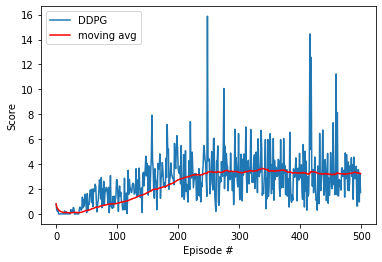

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [12]:
env.close()